In [1]:
'''
This code imports numpy packages and allows us to pass data from python to global javascript
objects. It was developed by znah@github
'''

import json
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt

from ipywidgets import widgets
from IPython.display import HTML, Javascript, display

def json_numpy_serializer(o):
    if isinstance(o, np.ndarray):
        return o.tolist()
    raise TypeError("{} of type {} is not JSON serializable".format(repr(o), type(o)))

def jsglobal(**params):
    code = [];
    for name, value in params.items():
        jsdata = json.dumps(value, default=json_numpy_serializer)
        code.append("window.{}={};".format(name, jsdata))
    display(Javascript("\n".join(code)))

In [2]:
%%javascript

// Loading the compiled MathBox bundle.
require.config({
    //baseUrl:'', paths: {mathBox: '../../tree/static/mathbox/build/mathbox-bundle'}
    // online compilation
    baseUrl: '', paths: {mathBox: '../static/mathbox/build/mathbox-bundle'}
    // online compilation without local library-- remove baseUrl
    //paths: {mathBox: '//cdn.rawgit.com/unconed/mathbox/eaeb8e15/build/mathbox-bundle'}
});

// Minified graphing functions

window.with_mathbox=function(element,func){require(['mathBox'],function(){var mathbox=mathBox({plugins:['core','controls','cursor','mathbox'],controls:{klass:THREE.OrbitControls},mathbox:{inspect:!1},element:element[0],loop:{start:!1},});var three=mathbox.three;three.renderer.setClearColor(new THREE.Color(0xFFFFFF),1.0);three.camera.position.set(-1,1,2);three.controls.noKeys=!0;three.element.style.height="400px";three.element.style.width="100%";function isInViewport(element){var rect=element.getBoundingClientRect();var html=document.documentElement;var w=window.innerWidth||html.clientWidth;var h=window.innerHeight||html.clientHeight;return rect.top<h&&rect.left<w&&rect.bottom>0&&rect.right>0}
var intervalId=setInterval(function(){if(three.element.offsetParent===null){clearInterval(intervalId);three.destroy();return}
var visible=isInViewport(three.canvas);if(three.Loop.running!=visible){visible?three.Loop.start():three.Loop.stop()}},100);func(mathbox);window.dispatchEvent(new Event('resize'))})};window.plotGraph=function(mathbox,f,xlabel='x',ylabel='y',zlabel='f(x,y)',rng=[[-3,3],[-5,5],[-3,3]]){var view=mathbox.cartesian({range:rng,scale:[1,1,1]},{rotation:(t)=>[0,t*0.02,0]}).grid({axes:[1,3]})
view.area({id:'yaxis',width:1,height:1,axes:[1,3],expr:function(emit,x,y,i,j){emit(4,0,0);emit(0,0,0)},items:2,channels:3,}).text({font:'Helvetica',style:'bold',width:16,height:5,depth:2,expr:function(emit,i,j,k,time){emit(ylabel)},}).label({color:'#000000',snap:!1,outline:2,size:24,offset:[0,-32],depth:.5,zIndex:1});view.vector({points:'#yaxis',color:0x000000,width:9,start:!0});view.area({id:'xaxis',width:1,height:1,axes:[1,3],expr:function(emit,x,y,i,j){emit(0,0,4);emit(0,0,0)},items:2,channels:3,}).text({font:'Helvetica',style:'bold',width:16,height:5,depth:2,expr:function(emit,i,j,k,time){emit(xlabel)},}).label({color:'#000000',snap:!1,outline:2,size:24,offset:[0,-32],depth:.5,zIndex:1,});view.vector({points:'#xaxis',color:0x000000,width:9,start:!0,});view.area({id:'zaxis',width:1,height:1,axes:[1,3],expr:function(emit,x,y,i,j){emit(0,4,0);emit(0,0,0)},items:2,channels:3,}).text({font:'Helvetica',style:'bold',width:16,height:5,depth:2,expr:function(emit,i,j,k,time){emit(zlabel)},}).label({color:'#000000',snap:!1,outline:2,size:24,offset:[0,-32],depth:.5,zIndex:1,});view.vector({points:'#zaxis',color:0x000000,width:9,start:!0,});var graph=view.area({id:'graph',width:64,height:64,axes:[1,3],expr:function(emit,y,x,i,j){emit(y,f(x,y),x)},items:1,channels:3,});view.surface({shaded:!0,lineX:!0,lineY:!0,points:graph,color:0x0000FF,width:1,});return view};window.addSegment=function(view,p0,p1,col){view.array({width:128,expr:function(emit,i,time){var b=i/128;var a=1-b;emit(a*p0[1]+b*p1[1],a*p0[2]+b*p1[2],a*p0[0]+b*p1[0])},channels:3,});view.line({color:col,width:10,size:2.5,stroke:'dotted',start:!1,end:!1,})};window.addPoint=function(view,p,col,label){view.array({width:4,items:2,channels:3,expr:function(emit,i,t){emit(p[1],p[2],p[0])},}).point({color:col,points:'<',size:15,depth:.5,zBias:50,}).text({font:'Helvetica',style:'bold',width:16,height:5,depth:2,expr:function(emit,i,j,k,time){emit(label)},}).label({color:col,snap:!1,outline:2,size:24,offset:[0,-32],depth:.5,zIndex:1,})};window.addCurve=function(view,ab,x,y,z,col){view.array({width:128,expr:function(emit,i,time){var t=(ab[1]-ab[0])*(i/128)+ab[0];emit(y(t),z(t),x(t))},channels:3,});view.line({color:col,width:20,size:2.5,start:!0,end:!0,})};window.addClosedCurve=function(view,ab,x,y,z,col){view.array({width:128,expr:function(emit,i,time){var t=(ab[1]-ab[0])*(i/128)+ab[0];emit(y(t),z(t),x(t))},channels:3,});view.line({color:col,width:20,size:2.5,start:!1,end:!1,})};window.addSurface=function(view,ab,cd,x,y,z,col,opa){view.matrix({width:64,height:64,expr:function(emit,i,j,time){var p=(ab[1]-ab[0])*(i/64)+ab[0];var q=(cd[1]-cd[0])*(j/64)+cd[0];emit(y(p,q),z(p,q),x(p,q))},items:1,channels:3}).surface({shaded:!0,lineX:!1,lineY:!1,color:col,width:1,opacity:opa})}
window.addSequence=function(view,seq,col){var idx=0;var d=new Date();var start=d.getTime();view.array({width:1,expr:function(emit,i,time){var nd=new Date();var now=nd.getTime();if(1000<now-start){idx=idx+1;if(seq.length<=idx){idx=0}
start=now}
emit(seq[idx][1],seq[idx][2],seq[idx][0])},items:1,channels:3}).point({color:col,points:'<',size:15,depth:.5,zBias:50,})}

<IPython.core.display.Javascript object>

# Part IX: Stochastic Gradient Descent

We now return to the example of logistic regression, but where we now use two parameters in our model. In particular, we will set

$$
\text{prob}(y=1\vert x;\beta_0, \beta_1) = \text{logit}(\beta_1 x +\beta_0)
$$
and
$$
\text{prob}(y=-1\vert x;\beta_0, \beta_1) = \text{logit}(-\beta_1 x - \beta_0)
$$


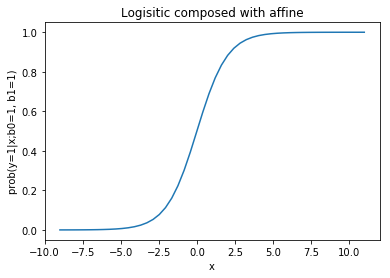

In [3]:
def logit(x):
    return 1/(1+np.exp(-x))

b0 = 1
b1 = 1

t = np.linspace(-10, 10)
s = b1 * t + b0
plt.plot(s, logit(s))
plt.title('Logisitic composed with affine')
plt.xlabel('x')
plt.ylabel('prob(y=1|x;b0=' + str(b0) + ', b1=' + str(b1) + ')')
plt.show()

Now suppose we are supplied with data $\{(x^{(i)}, y^{(i)})\}_{i=1}^N\subset\mathbb{R}\times\{-1, 1\}$, where we assume that $x^{(i)}$ are chosen by some arbitrary process and $y^{(i)}$ is drawn from a Bernoulli trial with the above probability of $y^{(i)}=1, -1$. Our goal is to use this data to infer the true values of $\beta_0$ and $\beta_1$. Setting

$$
{\bf \beta} = \begin{pmatrix}
\beta_0\\
\beta_1
\end{pmatrix}\text{ and } {\bf x} = \begin{pmatrix}
1\\
x
\end{pmatrix},
$$

$\text{logit}(\beta_1 x + \beta_0)=\text{logit}({\bf \beta}^T{\bf x})$. The maximum likelihood principle leads us to consider the maximization of the likelihood

$$
\mathcal{L}({\bf \beta}) = \prod_{i=1}^N \text{logit}(y^{(i)}{\bf \beta}^T {\bf x}^{(i)})
$$

and we therefore seek the minimize the negative log-likelihood

$$
\ell({\bf \beta}) = \frac{1}{N} \sum_{i=1}^N \log\left(1 + e^{-y^{(i)}{\bf \beta}^T {\bf x}^{(i)}}\right)
$$

Let's create some data to display this function


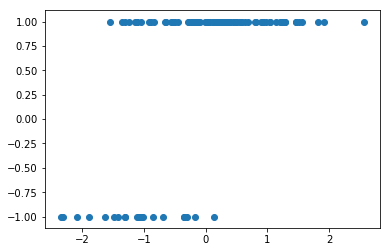

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
N = 100
beta = np.array([2, 2]) # The true parameters in the model
x = rd.randn(N) # Arbitrary x values

# y's drawn randomly
y = np.zeros(N)
for i in range(N):
    if rd.binomial(1,logit(beta.T @ [1, x[i]])) == 1:
        y[i] = 1
    else:
        y[i] = -1
        
plt.scatter(x, y)
plt.show()
        
jsglobal(X=x)
jsglobal(Y=y)
jsglobal(B=beta)

In [5]:
%%javascript

with_mathbox(element, function(mathbox) {
    
    var fcn = function(b0, b1) {
        
        var val = 0;
        for (var i = 0; i<X.length; i++) {
            val = val + Math.log(1 + Math.exp(-Y[i] * (b1 * X[i] + b0)));
        } 
        
        return val / X.length;
    }
    
    var view = plotGraph(mathbox, fcn, 'b0', 'b1', 'l(b0,b1)', [[-3, 3], [-1, 3], [-3, 3]]);
    
    addPoint(view, [B[0], B[1], 0], 0x3090FF, '(2, 2)');
    
    addPoint(view, [B[0], B[1], fcn(B[0], B[1])], 0xFF9030, 'Objective at True Parameter')
     
})

<IPython.core.display.Javascript object>

We can generate data and view the objective function determined by that data. We can also illustrate the convergence of stochastic gradient descent.

In [6]:
X_data = np.vstack([np.ones(N), x])
y_data = y

M = 10 # Number of indices to randomly select for each step

def dNLL(beta, X, y):
    return -X @ (y * logit(-beta.T @ X)) / M

iterations = 100

betas_sgd = np.zeros((iterations, 3))

for i in range(1,iterations):
    idxs = rd.choice(N, M, replace=False)
    betas_sgd[i,:2] = betas_sgd[i-1,:2] - np.sqrt(M)*dNLL(betas_sgd[i-1,:2].T, X_data[:,idxs], y_data[idxs])/i

jsglobal(SGD=betas_sgd)

<IPython.core.display.Javascript object>

In [7]:
%%javascript

with_mathbox(element, function(mathbox) {
    
    var fcn = function(b0, b1) {
        
        var val = 0;
        for (var i = 0; i<X.length; i++) {
            val = val + Math.log(1 + Math.exp(-Y[i] * (b1 * X[i] + b0)));
        } 
        
        return val / X.length;
    }
    
    var view = plotGraph(mathbox, fcn, 'b0', 'b1', 'l(b0,b1)', [[-3, 3], [-1, 3], [-3, 3]]);
    
    addPoint(view, [B[0], B[1], 0], 0x3090FF, '(2, 2)');
    
    addPoint(view, [B[0], B[1], fcn(B[0], B[1])], 0xFF9030, 'Objective at True Parameter');
    
    addSequence(view, SGD, 0xFF0000);
     
})

<IPython.core.display.Javascript object>